# Classification of Images using CIFAR-10 Dataset

### 1. Importing required libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
import matplotlib.pyplot as plt

Using TensorFlow backend.


### 2. Loading CIFAR-10 Dataset from library

#### cifar10.load_data()  loads the CIFAR10 dataset and returns tuple of numpy arrays. This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. 


#### Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

#### x_train: NumPy array of grayscale image data with shapes (50000, 32, 32, 3), containing the training data.

#### y_train: NumPy array of labels (integers in range 0-9) with shape (50000, 1) for the training data.

#### x_test: NumPy array of grayscale image data with shapes (10000, 32, 32, 3), containing the test data.

#### y_test: NumPy array of labels (integers in range 0-9) with shape (10000, 1) for the test data

In [2]:
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

#### Checking shape of loaded dataset

In [3]:
assert train_X.shape == (50000, 32, 32, 3)
assert test_X.shape == (10000, 32, 32, 3)
assert train_Y.shape == (50000, 1)
assert test_Y.shape == (10000, 1)

### 3.Visualizing Images

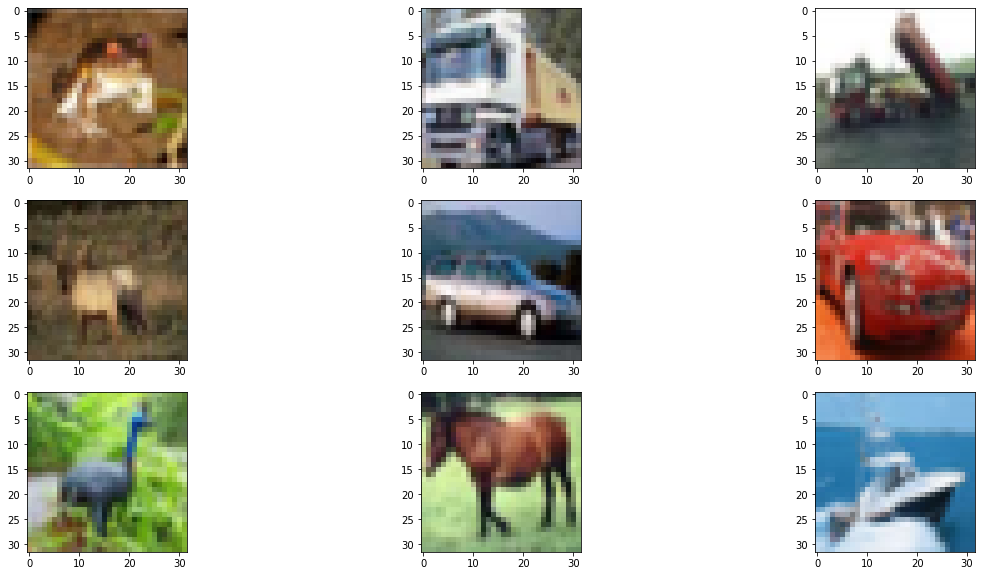

In [4]:
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
plt.show()

### 4.Converting pixel values into float type and then Normalizing them and Converting labels (integers) to binary class matrix.

#### Inorder to normalize the pixel values in between 0 and 1, we are going to divide them with 255.0. As these values must be in float dataype, we will convert the arrays into float datatype first and then normalize them.

#### Similarly using the method to_categorical(), a numpy array (or) a vector which has integers that represent different categories, can be converted into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data. This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.

In [6]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

train_Y=tf.keras.utils.to_categorical(train_Y)
test_Y=tf.keras.utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

#### Testing set labels shape - (10000, 10)

#### Training set labels shape - (50000, 10)

In [14]:
print(test_Y.shape)
print(train_Y.shape)

(10000, 10)
(50000, 10)


### 5.Creating model
 
#### Model is a directed acyclic graph of layers. Functional API is used to build keras models startin gwith defining shape of inputs to first layer and then chaining layer tranformations like maxpooling,batch normalization,dropout,flatten,dense,etc

In [7]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

 
model.compile(loss='categorical_crossentropy',optimizer="rmsprop",metrics=['accuracy'])

### 6.Plot the model 

#### Plots summary of how the data gets transformed at each stage of model along with input and output shapes.

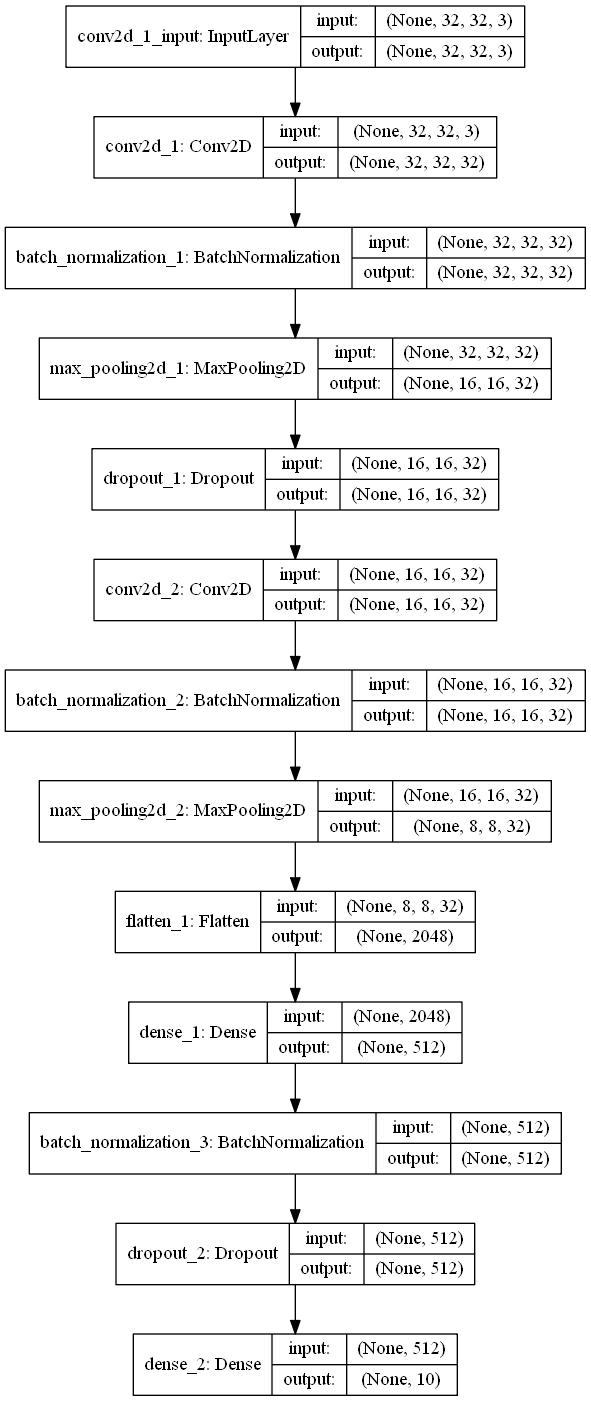

In [8]:
keras.utils.plot_model(model,"Image Classifier.png",show_shapes=True)

### 7. Summary of the model

#### Prints summary of how the data gets transformed at each stage of model with shape and number of parameters trained.

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)         

### 8. Fit data into model

#### fit() is used when the entire training dataset can fit into the memory and no data augmentation is applied.

In [12]:
model.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=12,batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 1213s 24ms/step - loss: 0.7663 - accuracy: 0.7391 - val_loss: 0.9037 - val_accuracy: 0.6985
Epoch 2/12
50000/50000 [==============================] - 1235s 25ms/step - loss: 0.7365 - accuracy: 0.7478 - val_loss: 1.1095 - val_accuracy: 0.6328
Epoch 3/12
50000/50000 [==============================] - 955s 19ms/step - loss: 0.7117 - accuracy: 0.7537 - val_loss: 0.9297 - val_accuracy: 0.7112
Epoch 4/12
50000/50000 [==============================] - 296s 6ms/step - loss: 0.6929 - accuracy: 0.7639 - val_loss: 0.9823 - val_accuracy: 0.6691
Epoch 5/12
50000/50000 [==============================] - 944s 19ms/step - loss: 0.6700 - accuracy: 0.7722 - val_loss: 0.9083 - val_accuracy: 0.6863
Epoch 6/12
50000/50000 [==============================] - 321s 6ms/step - loss: 0.6531 - accuracy: 0.7778 - val_loss: 0.9825 - val_accuracy: 0.6589
Epoch 7/12
50000/50000 [==============================] 

### 9. Compute accuracy of model on testing data

In [15]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

10000/10000 [==============================] - 21s 2ms/step
73.989999294281


### 10. Save the model 

In [16]:
model.save("model1_cifar_10epoch.h5")

### 11. Make a dictionary to map to the output classes and make predictions from the model

1 automobile


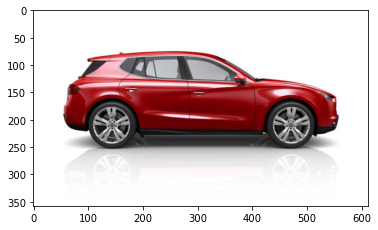

In [40]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open(r"C:\Users\User\Desktop\PROJECT 1\image2.jpg")
plt.imshow(im)
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

0 aeroplane


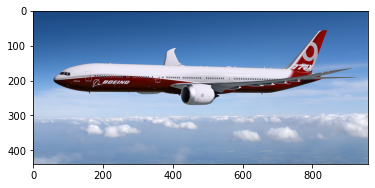

In [23]:
im=Image.open(r"C:\Users\User\Desktop\PROJECT 1\image1.jpg")
plt.imshow(im)
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

8 ship


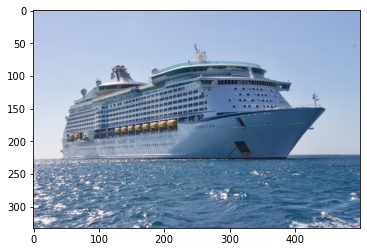

In [32]:
im=Image.open(r"C:\Users\User\Desktop\PROJECT 1\image3.jpeg")
plt.imshow(im)
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

5 dog


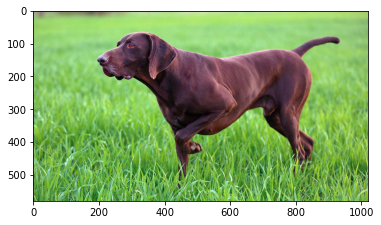

In [35]:
im=Image.open(r"C:\Users\User\Desktop\PROJECT 1\image4.jpg")
plt.imshow(im)
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

### Conclusion:

### This Neural network model classifies 10 varieties of images including dog, aeroplane, ship,etc with 73.9% accuracy.